This notebook illustrates methods to fill missing data for a time series using pandas. 

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load data

In [4]:
filename = '../data.csv'

In [ ]:
df = pd.read_csv()

In [102]:
# Create synthetic dataset with missing values
dates = pd.date_range(start='1990-01-01', periods=104, freq='W')
data = 2*np.random.randn(104) + 10*np.sin((np.arange(0,104))/4) + 0.5*np.arange(0,104)
data[30:32] = np.NaN
data[60:70] = np.NaN
df = pd.DataFrame(data=data, index=dates, columns=['y'])


# Check for missing data

We check for missing data in the target and quantify how many missing values there are.

In [103]:
n_missing = df['y'].isnull().sum()

print(f"Number of datapoints missing: {n_missing}")
print(f"Proportion of dataset missing: {n_missing/len(df):.2%}")

Number of datapoints missing: 12
Proportion of dataset missing: 11.54%


We plot the time series to see where the data is missing.

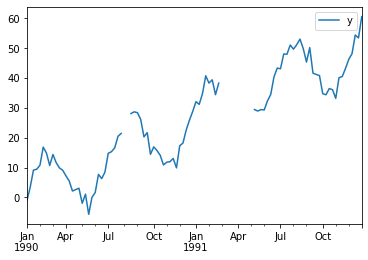

In [104]:
df.plot()

# Method 1: Backfill

Apply the backfill method

In [120]:
df_ = df.fillna(method='backfill')

Check missing values filled

In [121]:
df_.isnull().any()

y    False
dtype: bool

Plot the time series

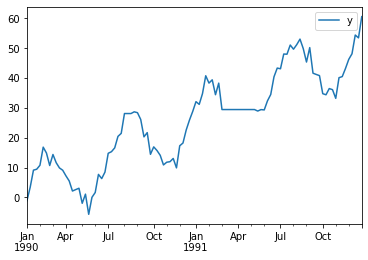

In [128]:
ax = df_.plot()

# Method 2: Linear interpolation

In [114]:
df_ = df.interpolate(method='linear')

In [115]:
df_.isnull().any()

y    False
dtype: bool

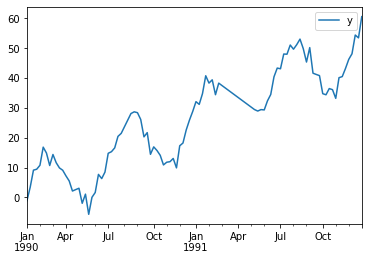

In [116]:
df_.plot()

# Method 3: Polynomial interpolation

In [173]:
df_ = df.interpolate(method='polynomial', order=2)

In [174]:
df_.isnull().any()

y    False
dtype: bool

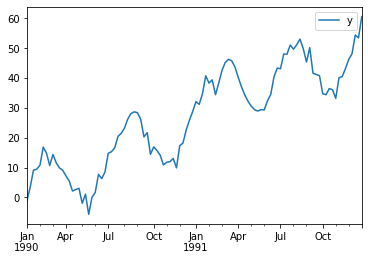

In [175]:
df_.plot()

# Method 4: Splines

In [199]:
df_ = df.interpolate(method='spline', order=3)

In [200]:
df_.isnull().any()

y    False
dtype: bool

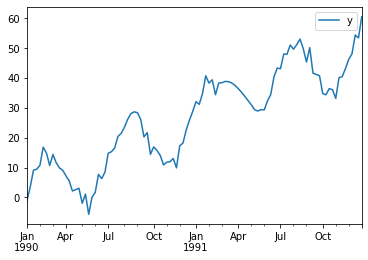

In [201]:
df_.plot()